In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
loan = pd.read_csv('C://Users//angeorge//Desktop//Personal_Content//Upgrad//Lending Case Study//loan.csv')

C:\Users\angeorge\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### The total number of rows and columns

In [42]:
rows = loan.shape[0]
cols = loan.shape[1]
  
# displaying the number of rows and columns
print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 39717
Columns: 111


### Displaying the data types of variables

In [43]:
pd.set_option("max_rows", None)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


info() is used to check the Information about the data and the datatypes of each respective attributes.
Looking at the data, there are float64(74), int64(13) and object(24) data types.

### Checking for duplicate data

In [44]:
dups = loan.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

loan[dups]

Number of duplicate rows = 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


There are no duplicate rows

### Checking for Missing Values

In [45]:
pd.set_option("max_rows", None)

In [46]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               33.11
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

1.There are 54 columns with 100% null values. we will be dropping these columns.
2.In addition there are 3 columns i.e. 'mths_since_last_delinq','mths_since_last_record' & 'next_pymnt_d' with >=50% missing values, hence we will be dropping these columns as well.

In [47]:
## To drop null columns
loan.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort',
'total_bc_limit','total_il_high_credit_limit','mths_since_last_delinq','mths_since_last_record',
'next_pymnt_d'], axis=1, inplace = True)

In [48]:
## To drop null rows
loan.dropna(subset = ["emp_title","emp_length","title","revol_util","last_pymnt_d","last_credit_pull_d",
                      "collections_12_mths_ex_med","chargeoff_within_12_mths","pub_rec_bankruptcies","tax_liens"], inplace=True)

In [49]:
## Replacing null values with string " Blanks"
nan_value = "Blanks"
loan["desc"].fillna(nan_value,inplace=True)

1. The columns "emp_title","emp_length","title","revol_util","last_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","chargeoff_within_12_mths","pub_rec_bankruptcies","tax_liens"
have less than 10% of null values, hence removed only the null rows
2. column "desc" has 33% of null value. hence, we have replaced null value with string "Blanks". This creates another category.

In [50]:
## Removing non value add columns
loan.drop(['id','member_id','pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths',
             'delinq_amnt','tax_liens'], axis=1, inplace = True)

There are around 10 columns which does not provide any valuable insight about the member, hence we are dropping all those columns.

In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36431 non-null  int64  
 1   funded_amnt              36431 non-null  int64  
 2   funded_amnt_inv          36431 non-null  float64
 3   term                     36431 non-null  object 
 4   int_rate                 36431 non-null  object 
 5   installment              36431 non-null  float64
 6   grade                    36431 non-null  object 
 7   sub_grade                36431 non-null  object 
 8   emp_title                36431 non-null  object 
 9   emp_length               36431 non-null  object 
 10  home_ownership           36431 non-null  object 
 11  annual_inc               36431 non-null  float64
 12  verification_status      36431 non-null  object 
 13  issue_d                  36431 non-null  object 
 14  loan_status           

### Cleaning the data columns

In [52]:
## Remove % from columns int_rate & revol_util
loan['int_rate'] = loan['int_rate'].replace({'%': ''}, regex=True)
loan['revol_util'] = loan['revol_util'].replace({'%': ''}, regex=True)

Note: emp_length column is not cleaned because + & < has a meaning and creates a seperate category for the data analysis

In [53]:
## Change the data type of the column
loan[['int_rate', 'revol_util']] = loan[['int_rate', 'revol_util']].apply(pd.to_numeric)

In [54]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36431 non-null  int64  
 1   funded_amnt              36431 non-null  int64  
 2   funded_amnt_inv          36431 non-null  float64
 3   term                     36431 non-null  object 
 4   int_rate                 36431 non-null  float64
 5   installment              36431 non-null  float64
 6   grade                    36431 non-null  object 
 7   sub_grade                36431 non-null  object 
 8   emp_title                36431 non-null  object 
 9   emp_length               36431 non-null  object 
 10  home_ownership           36431 non-null  object 
 11  annual_inc               36431 non-null  float64
 12  verification_status      36431 non-null  object 
 13  issue_d                  36431 non-null  object 
 14  loan_status           

### Making different list for categorical and numerical columns

In [55]:
cat=[]
num=[]
for i in loan.columns:
    if loan[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


### Outlier Detection and removal for numerical columns

In [56]:
## Outlier detection and removal using Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(loan[num]))   # get the z-score of every value with respect to their columns
loan_num = loan[num][(z < 3).all(axis=1)]    # Select only the rows without a single outlier
loan_num.shape, loan[num].shape

((29182, 25), (36431, 25))

In [57]:
## Categorical dataframe
loan_cat = loan[cat]
loan_cat.shape

## Numerical Dataframe
loan_cat.shape, loan_num.shape

((36431, 19), (29182, 25))

### Univariate Analysis

#### Numerical columns

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'out_prncp'}>],
       [<AxesSubplot:title={'center':'out_prncp_inv'}>,
        <AxesSubplot:title={'center':'total_pymnt'}>,
        <AxesSubplot:title={'center':'total_pymnt_inv'}>,
        <AxesSubplot:title={'center':'to

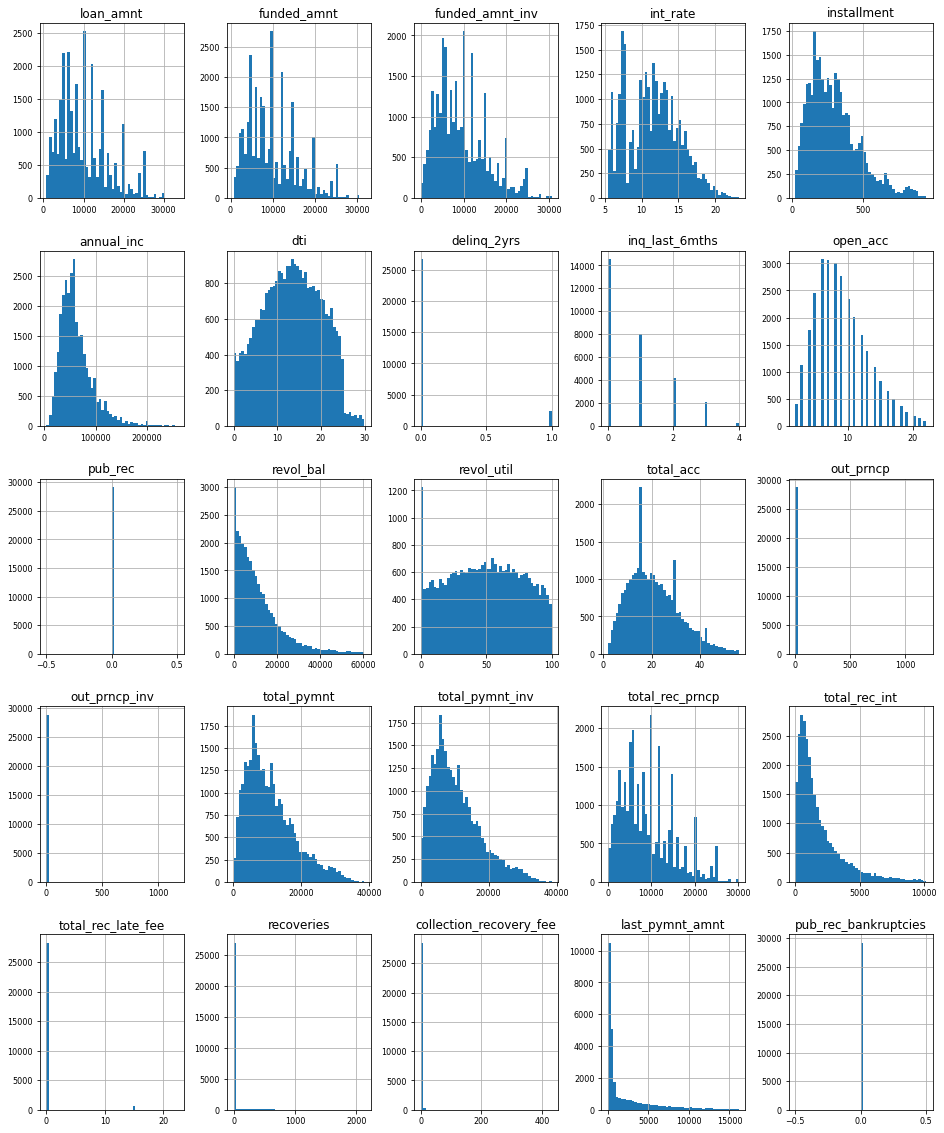

In [58]:
loan_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Observations:
1. From the above plot, we see that most of the variables are positively skewed except 'dti','revol_util', 'pub_rec_bankruptcies' & pub_rec which are normally distributed.
2. 'loan_amnt', 'funded_amnt', 'funded_amnt_inv plot shows that maximum number of members have received loan of amount 10,000
3. 'annual_inc' plot shows that maximum number of member have annual income between 50-60k.
4. 'int_rate' plot shos that maximum number of loans have interest rate range between 10-15%

#### Categorical Columns

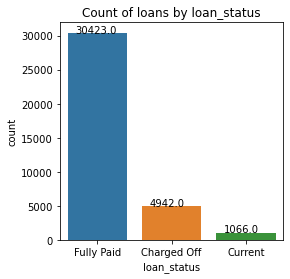

In [124]:
plt.figure(figsize=(4,4))
plt.title('Count of loans by loan_status')
ax = sns.countplot(x=loan_cat['loan_status'], order=loan_cat['loan_status'].value_counts(ascending=False).index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+4))

plt.show()

#### Observations:
    1.Maximum no. of loans are fully paid
    2.84% of loans are fully paid, for 14% of loans applicants has not paid the instalments in due time for a long period of         time and for 3% of loans installment are still in progress. 

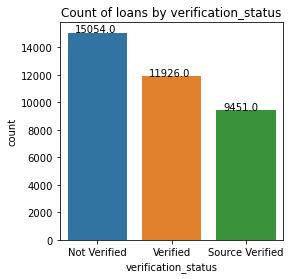

In [116]:
plt.figure(figsize=(4,4))
plt.title('Count of loans by verification_status')
ax = sns.countplot(x=loan_cat['verification_status'], order=loan_cat['verification_status'].value_counts(ascending=False).index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+4))

plt.show()

#### Observations:
1. 41% of loans are not verified, which gives an indication of high risk.
2. 33% of loans are verified and 26% of loans are source verified

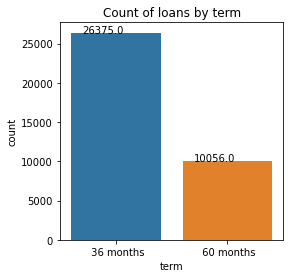

In [115]:
plt.figure(figsize=(4,4))
plt.title('Count of loans by term')
ax = sns.countplot(x=loan_cat['term'], order=loan_cat['term'].value_counts(ascending=False).index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+4))

plt.show()

#### Observations:
1. maximum no. of loans have term of 36 months

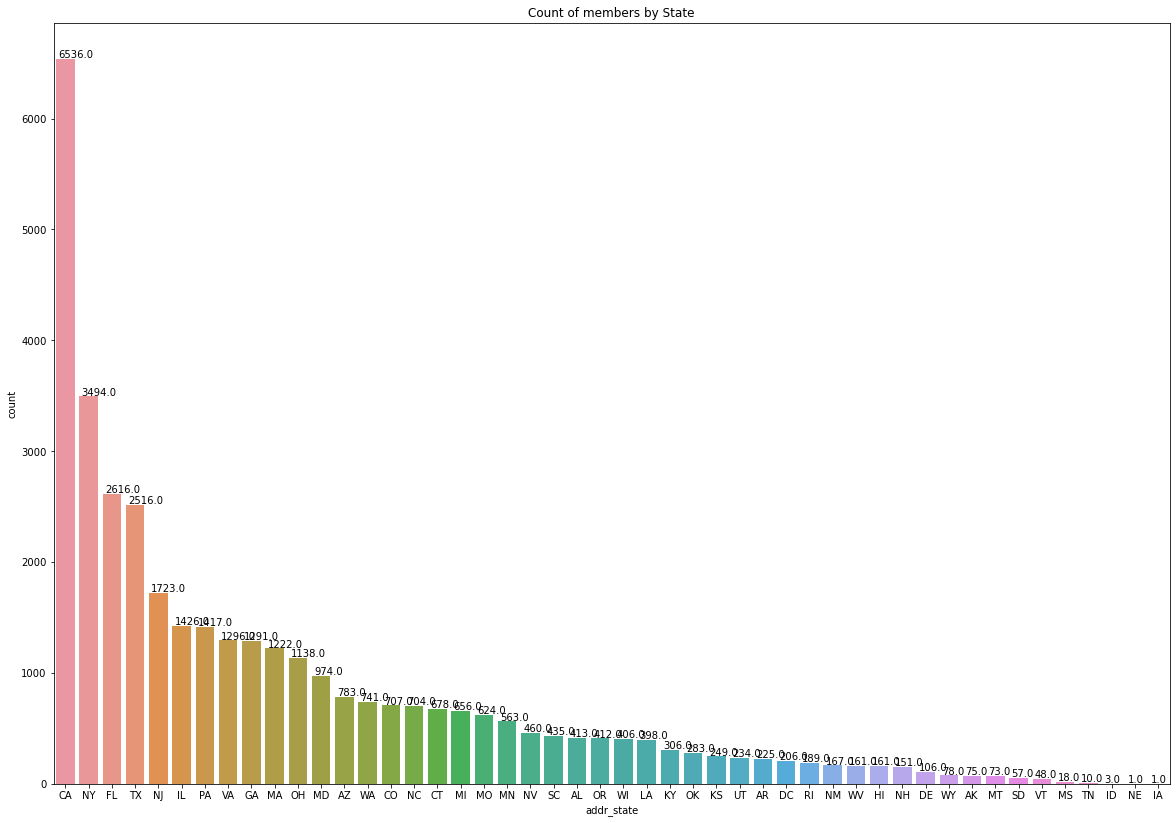

In [107]:
plt.figure(figsize=(20,14))
plt.title('Count of members by State')
ax = sns.countplot(x=loan_cat['addr_state'], order=loan_cat['addr_state'].value_counts(ascending=False).index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+9))

plt.show()

#### Observations:
1. Highest number of loan applications are received from state "CA - california"
2. 80% of applicants are from major states like CA,NY,FL,TX,NJ,IL & PA

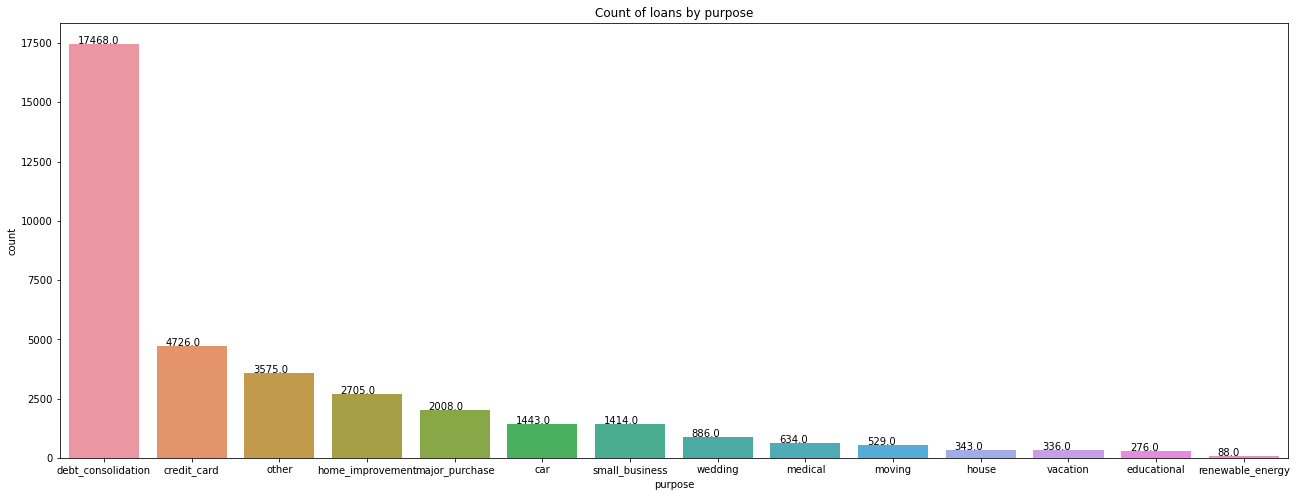

In [123]:
plt.figure(figsize=(22,8))
plt.title('Count of loans by purpose')
ax = sns.countplot(x=loan_cat['purpose'], order=loan_cat['purpose'].value_counts(ascending=False).index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+4))

plt.show()

#### Observations:
1. 48% of loans applications are receievd under category "Debt_Consolidation"
2. 13% applicants have taken loan in the form of credit card

### Segmented Univariate Analysis

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  1769             1322      1851
Current                       216              287       563
Fully Paid                  13069             7842      9512


<AxesSubplot:xlabel='loan_status'>

<Figure size 288x288 with 0 Axes>

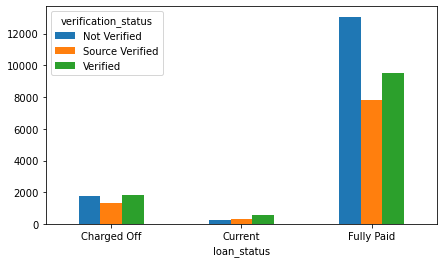

In [130]:
# Cross tabulation between Loan Status and Verfication Status
CrosstabResult=pd.crosstab(index=loan_cat['loan_status'],columns=loan_cat['verification_status'])
print(CrosstabResult)
 
# Grouped bar chart between Loan Status and Verfication Status
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

#### Observations:
1. Larger number of loans under fully paid category are not verified
2. maximum number of loans are verified under category for which installments are in progress 

Text(0.5, 1.0, 'Loan Status by State')

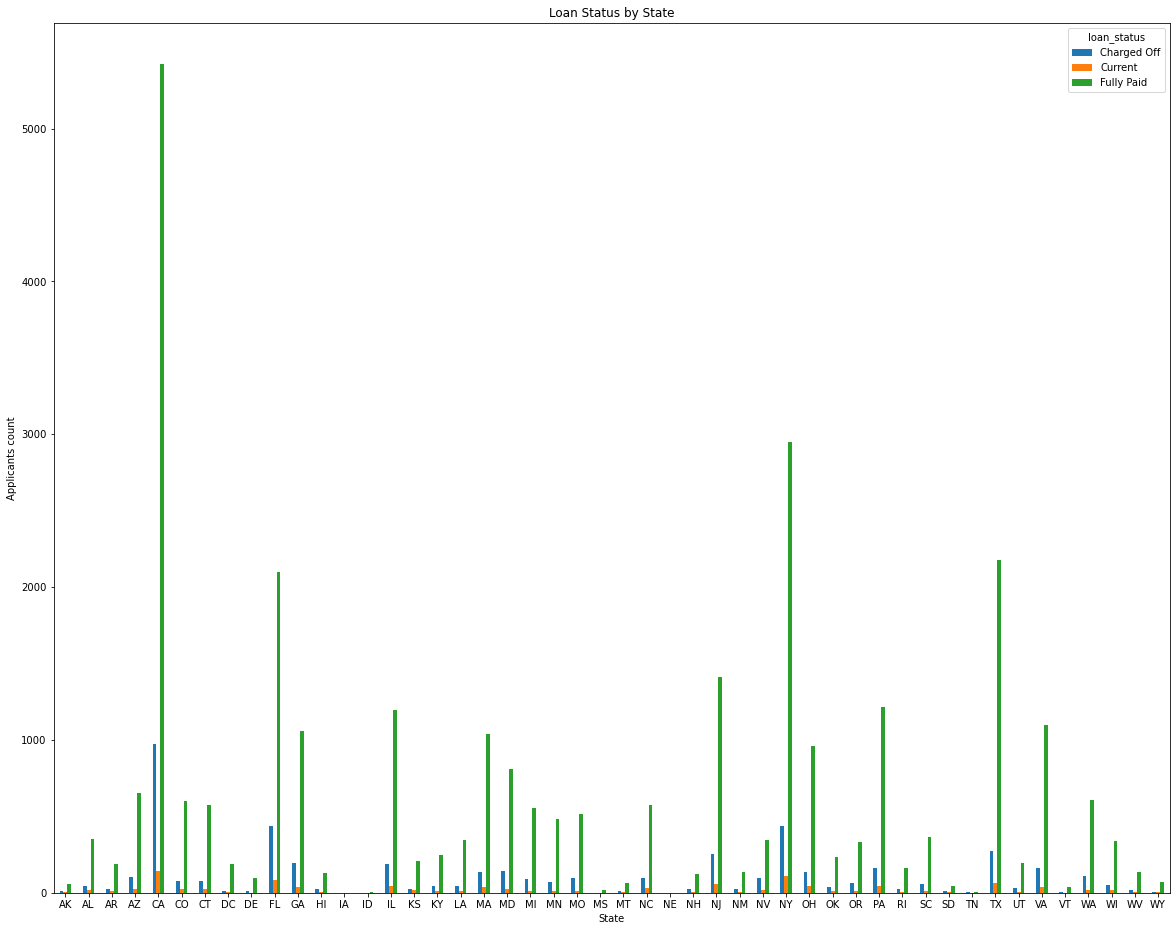

In [150]:
# Cross tabulation between Loan Status and State
CrosstabResult=pd.crosstab(index=loan_cat['addr_state'],columns=loan_cat['loan_status'])
 
# Grouped bar chart between Loan Status and State
CrosstabResult.plot.bar(figsize=(20,16), rot=0)
# naming the x-axis
plt.xlabel('State')
# naming the y-axis
plt.ylabel('Applicants count')
# plot title
plt.title('Loan Status by State')

#### Observations:
1. Maximum number of loans are fully paid in California
2. Another concerning point with california is, large number of loans are in charged off status which indicates that there are high risk applicants in this state.

term          36 months   60 months  Total
loan_status                               
Charged Off        2729        2213   4942
Current               0        1066   1066
Fully Paid        23646        6777  30423
Total             26375       10056  36431


<AxesSubplot:xlabel='loan_status'>

<Figure size 360x360 with 0 Axes>

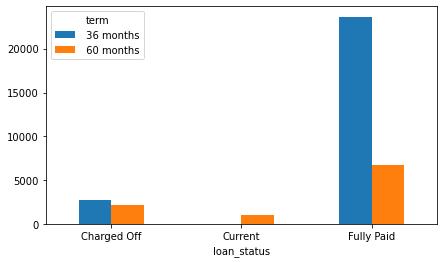

In [139]:
# Cross tabulation between Loan Status and Verfication Status
CrosstabResult=pd.crosstab(loan_cat.loan_status,loan_cat.term, margins=True, margins_name="Total")
print(CrosstabResult)
 
# Grouped bar chart between Loan Status and Verfication Status
pd.crosstab(loan_cat.loan_status,loan_cat.term).plot.bar(figsize=(7,4), rot=0)

#### Observations:
1. loans which are in progress are part of 60 month tenure
2. maximum number of loans from 36 month tenure are in charged off status

<AxesSubplot:xlabel='purpose'>

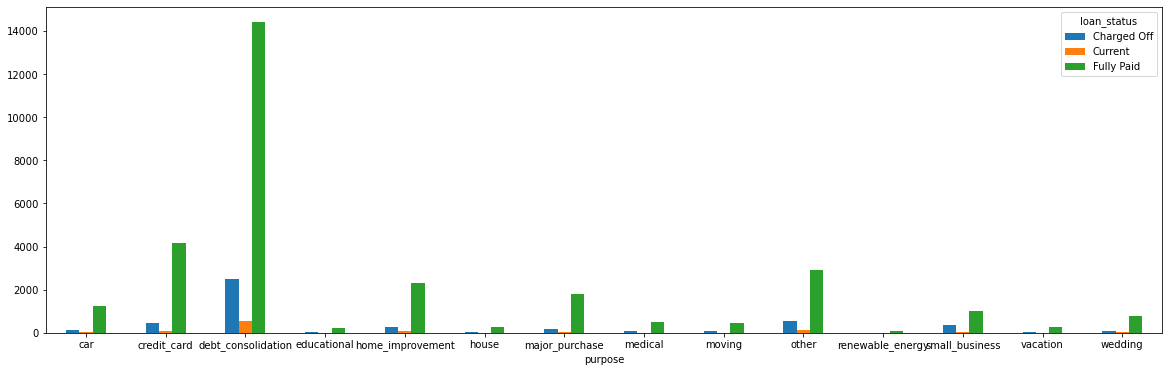

In [174]:
# Cross tabulation between Loan Status and purpose
CrosstabResult=pd.crosstab(index=loan_cat['purpose'],columns=loan_cat['loan_status'])
 
# Grouped bar chart between Loan Status and Verfication Status
CrosstabResult.plot.bar(figsize=(20,6), rot=0)

### Observations
1. Highest defaulters are from "debt conslidation category"

In [134]:
## Summary Statistics
loan_num.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,29182.0,10091.929100,6070.857947,725.00,5000.000000,9000.000000,14000.000000,33425.00000
funded_amnt,29182.0,9856.802138,5826.976068,725.00,5000.000000,9000.000000,13450.000000,31825.00000
funded_amnt_inv,29182.0,9495.424766,5750.395695,0.00,5000.000000,8400.000000,12864.304375,30600.00000
int_rate,29182.0,11.538093,3.535724,5.42,8.490000,11.490000,13.980000,23.22000
installment,29182.0,295.983513,176.456508,19.87,162.730000,263.780000,389.895000,946.89000
annual_inc,29182.0,62661.852913,32839.524568,4000.00,40000.000000,55000.000000,77161.500000,259000.00000
dti,29182.0,13.351850,6.660452,0.00,8.210000,13.420000,18.600000,29.99000
delinq_2yrs,29182.0,0.083682,0.276915,0.00,0.000000,0.000000,0.000000,1.00000
inq_last_6mths,29182.0,0.814577,0.987008,0.00,0.000000,1.000000,1.000000,4.00000
open_acc,29182.0,9.003050,4.013807,2.00,6.000000,8.000000,11.000000,22.00000


#### Observations:
    1. maximum loan amount provided is 31,825 & minimum loan amount provided is 725
    2. maximum interest rate of loan provided is 23.22 % and 5.42%
    3. highest annual income of applicant who applied for loan is 259000

In [135]:
loan_cat.describe().T

,count,unique,top,freq
term,36431,2,36 months,26375
grade,36431,7,B,11035
sub_grade,36431,35,B3,2674
emp_title,36431,28205,US Army,131
emp_length,36431,11,10+ years,8407
home_ownership,36431,4,RENT,17464
verification_status,36431,3,Not Verified,15054
issue_d,36431,51,11-Dec,2126
loan_status,36431,3,Fully Paid,30423
url,36431,36431,https://lendingclub.com/browse/loanDetail.acti...,1


#### Observations:
    1. Maximum number of loans are having term of 36 months
    2. Applicants with employment length of 10+ years have applied for highest number of loans
    3. Maximum number of loans are not verified
    4. Maximum number of loans are fully paid

### Bivariate Analysis

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.1 Bar plot to check funded loan amount by top states 

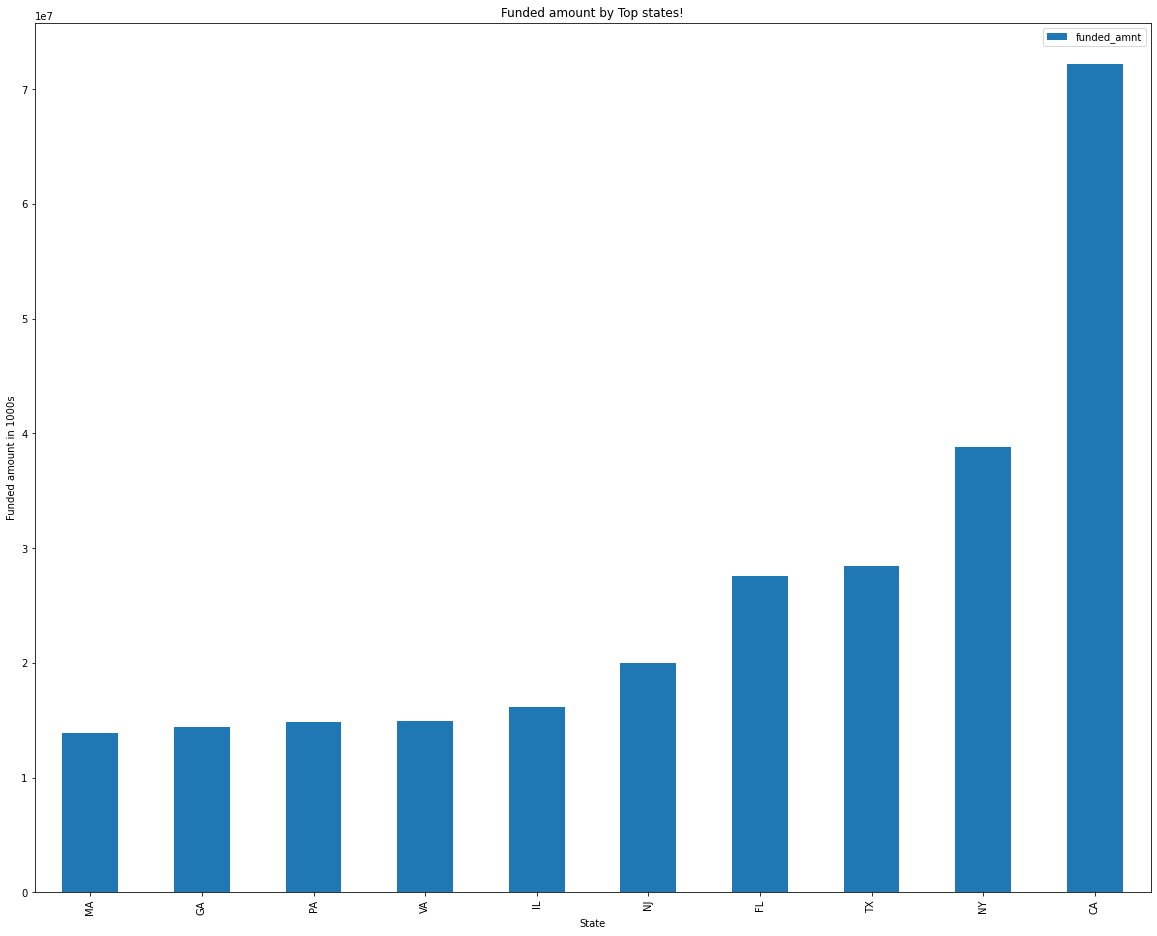

In [147]:
loan.groupby(by=['addr_state'])['funded_amnt'].sum().reset_index().sort_values(['funded_amnt']).tail(10).plot(x='addr_state',
                                                                                                           y='funded_amnt',
                                                                                                           kind='bar',
                                                                                                           figsize=(20,16))
# naming the x-axis
plt.xlabel('State')
# naming the y-axis
plt.ylabel('Funded amount in 1000s')
# plot title
plt.title('Funded amount by Top states!')
plt.show()

#### Observations:
1.Highest funds are sanctioned in CA -california state
2. FL,TX,NY & CA are the top 4 states in funds distribution. These are high revenue generation states

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.2 Bar plot for Funded invested Vs Home ownership

<AxesSubplot:title={'center':'Funds provided vs House ownership'}, xlabel='home_ownership', ylabel='funded_amnt_inv'>

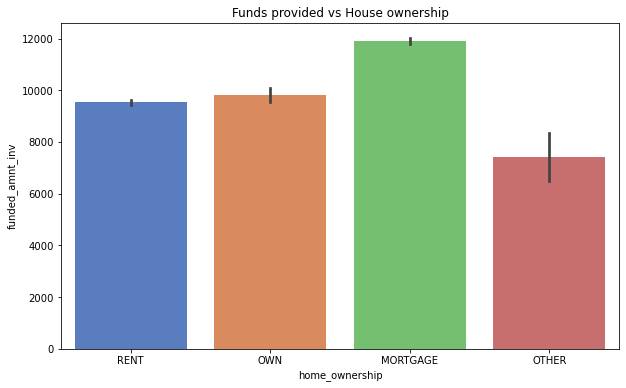

In [163]:
plt.figure(figsize=(10,6))
plt.title('Funds provided vs House ownership')
sns.barplot(x= 'home_ownership', y= 'funded_amnt_inv', data=loan, palette='muted')

#### Observations:
1. Applicants who have mortgage have taken more funds 

In [ ]:
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.3 Bar plot for Deliquency Vs Purpose

<AxesSubplot:title={'center':'Delinquency vs Purpose'}, xlabel='purpose', ylabel='delinq_2yrs'>

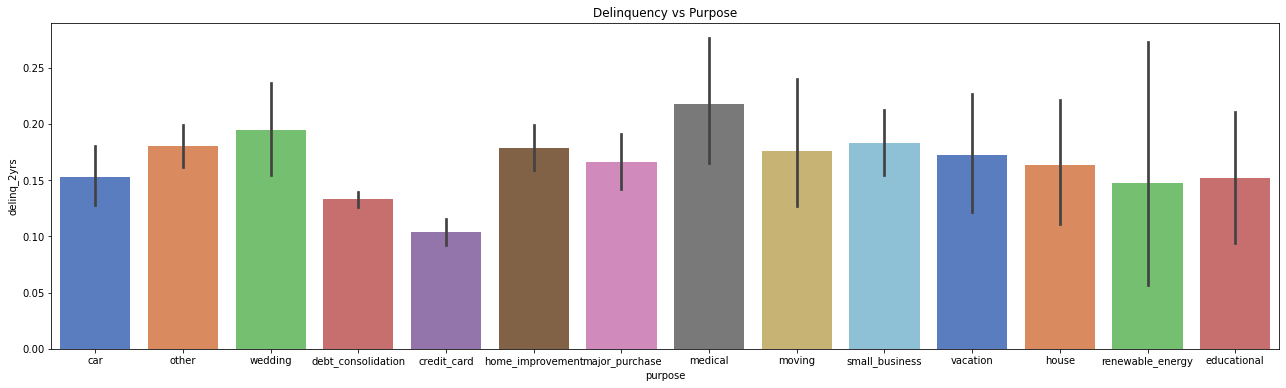

In [169]:
plt.figure(figsize=(22,6))
plt.title('Delinquency vs Purpose')
sns.barplot(x= 'purpose', y= 'delinq_2yrs', data=loan, palette='muted')

#### Observations:
1. Highest delay in payment done by applicants who have taken loan under "medical" category
2. Least delay in payment are done by creditcard applicants

In [ ]:
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.4 Bar plot for loan_status Vs Annual income

<AxesSubplot:title={'center':'Annual Inc vs Purpose'}, xlabel='loan_status', ylabel='annual_inc'>

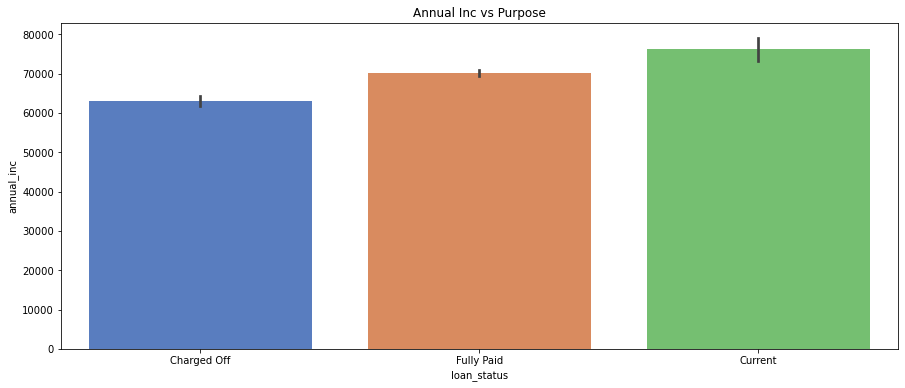

In [171]:
plt.figure(figsize=(15,6))
plt.title('Annual Inc vs Purpose')
sns.barplot(x= 'loan_status', y= 'annual_inc', data=loan, palette='muted')

#### Observations:
1. Applicants with annual salary between 60k to 65k are defaulters i.e charged off

### Multivariate Analysis

<AxesSubplot:>

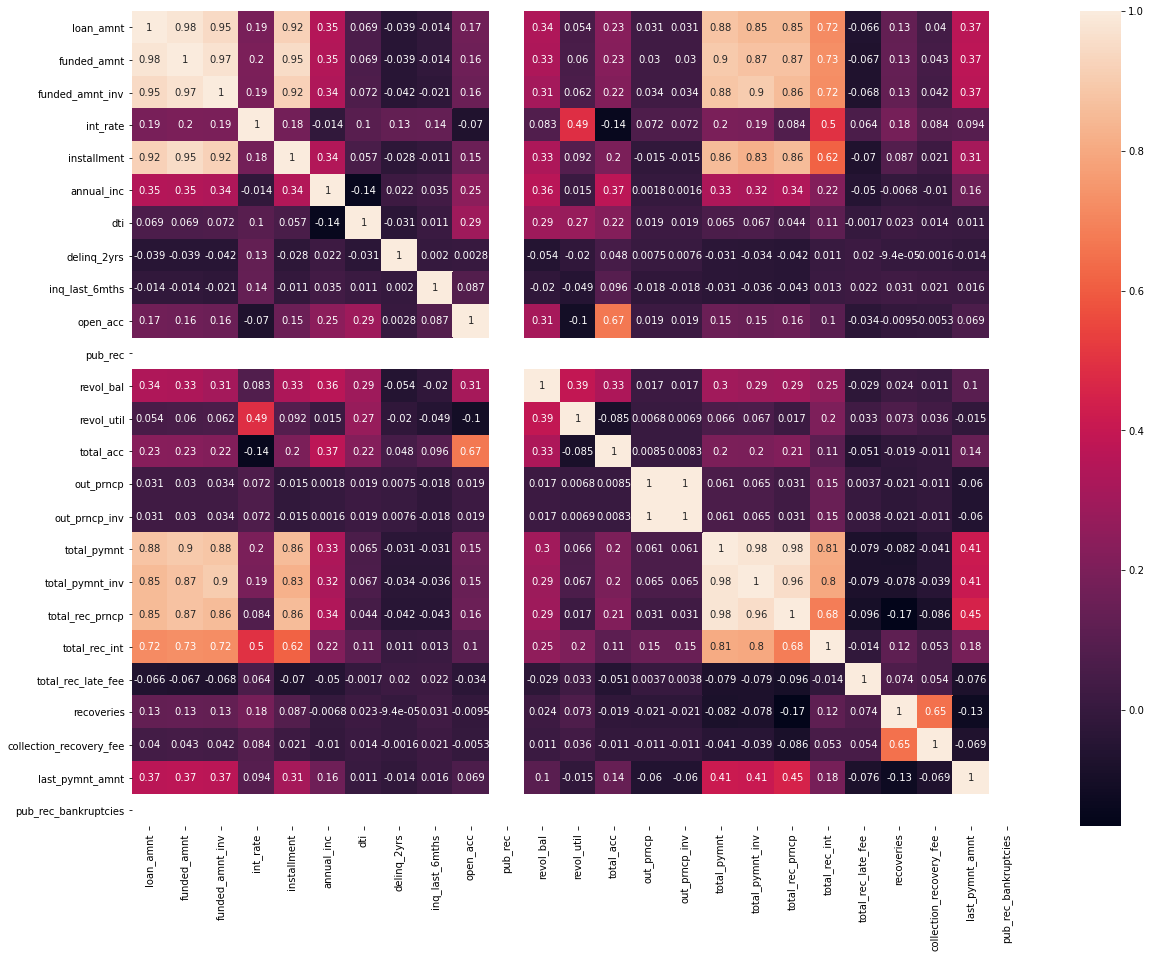

In [182]:
### Correlation matrix
plt.subplots(figsize=(20,15))
sns.heatmap(loan_num.corr(), annot=True)

#### Observations:
1. delinq_2yrs & total_rec_late_fee have least corelation with other variables
2. total rec prncp has 97% percent corelation with funded_amnt_inv, which menas high recovery of principal is resulting in loan fulfillment
3. installment has 86% of corelation with total rec prncp, higher installments are helping principal recovery

### Recommendation

1.14% of loans applicants who have has not paid the instalments are from  "debt consolidation category”. Need assess the risk for these applicants more rigorously
2.Credit card applicants have good payment record after “debt consolidation category”, company should consider providing interest rate waiver to these applicants.
3.Highest delay in payment done by applicants who have taken loan under "medical" category, company should reconsider providing more installments for these category